In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv("HousingData.csv")
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Explorartory Data Analysis
## Corealtion

In [20]:
for col in dataset.columns[:-1]:
    if dataset[col].isnull().sum()>0:
        dataset[col].fillna(dataset[col].mean(),inplace=True)

In [22]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.428704,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.395113,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.564399,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.043583,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.570048,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.603347,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.577034,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.478280,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.461333,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.518152,-0.468536


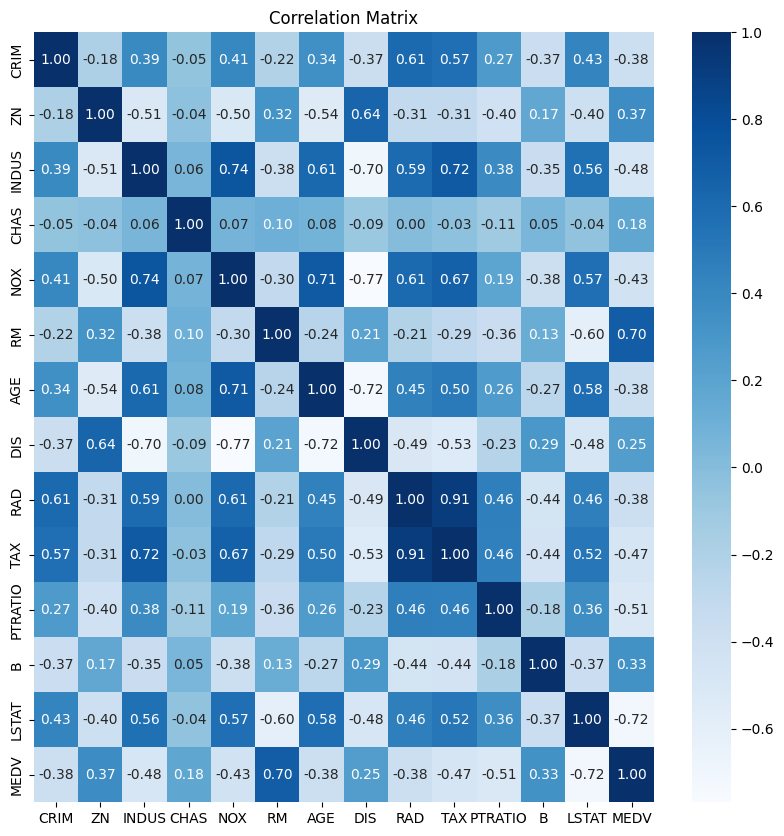

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

### Split dataset into training and testing dataset

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train,test = train_test_split(dataset,test_size=0.3,random_state=85)

In [27]:
train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
414,45.746100,0.000000,18.100000,0.0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
92,0.042030,11.211934,15.040000,0.0,0.464,6.442,53.6,3.6659,4,270,18.2,395.01,8.16,22.9
218,0.110690,0.000000,13.890000,1.0,0.550,5.951,93.8,2.8893,5,276,16.4,396.90,17.92,21.5
298,0.064660,70.000000,2.240000,0.0,0.400,6.345,20.1,7.8278,5,358,14.8,368.24,4.97,22.5
484,2.378570,0.000000,18.100000,0.0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,0.043370,21.000000,11.083992,0.0,0.439,6.115,63.0,6.8147,4,243,16.8,393.97,9.43,20.5
196,3.611874,80.000000,1.520000,0.0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3
397,7.672020,0.000000,18.100000,0.0,0.693,5.747,98.9,1.6334,24,666,20.2,393.10,19.92,8.5
160,1.273460,0.000000,19.580000,1.0,0.605,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0


In [28]:
test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
27,0.955770,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.280000,14.8
311,0.790410,0.0,9.90,0.0,0.544,6.122,52.8,2.6403,4,304,18.4,396.90,5.980000,22.1
105,0.132620,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5,384,20.9,394.05,16.470000,19.5
117,0.150980,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.300000,19.2
66,0.043790,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4,337,16.1,396.90,10.240000,19.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.656650,20.0,3.97,0.0,0.647,6.842,100.0,2.0107,5,264,13.0,391.93,6.900000,30.1
501,0.062630,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,7.155871,22.4
32,1.387990,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4,307,21.0,232.60,27.710000,13.2
288,3.611874,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6,293,16.6,396.90,7.600000,22.3


### Feature Selection

In [29]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(train[train.columns[:-1]],train["MEDV"])
mutual_info

array([0.29500293, 0.21261909, 0.39843675, 0.03649347, 0.43741236,
       0.55832011, 0.27043717, 0.3082555 , 0.20843752, 0.37855461,
       0.40340617, 0.16562267, 0.7270918 ])

In [96]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = train.columns[:-1]
mutual_info.sort_values(ascending=False)

LSTAT      0.727092
RM         0.558320
NOX        0.437412
PTRATIO    0.403406
INDUS      0.398437
TAX        0.378555
DIS        0.308256
CRIM       0.295003
AGE        0.270437
ZN         0.212619
RAD        0.208438
B          0.165623
CHAS       0.036493
dtype: float64

In [97]:
input_col = ['LSTAT', 'RM', 'NOX', 'PTRATIO', 'INDUS', 'TAX', 'DIS', 'CRIM', 'AGE',
       'ZN', 'B']
input_col

['LSTAT',
 'RM',
 'NOX',
 'PTRATIO',
 'INDUS',
 'TAX',
 'DIS',
 'CRIM',
 'AGE',
 'ZN',
 'B']

## Standardize the dataset

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [99]:
x_train = scaler.fit_transform(train[input_col])
x_train

array([[ 3.45292039, -2.40797983,  1.14350343, ...,  1.11240308,
        -0.46801032, -3.02439751],
       [-0.61059203,  0.23337726, -0.81858061, ..., -0.5957993 ,
         0.05176354,  0.41840897],
       [ 0.76553154, -0.44104101, -0.08172809, ...,  0.8841519 ,
        -0.46801032,  0.43962207],
       ...,
       [ 1.04752407, -0.72124738,  1.14350343, ...,  1.0719069 ,
        -0.46801032,  0.3969714 ],
       [-0.9856421 , -0.03034638,  0.3895148 , ...,  0.83997425,
        -0.46801032, -0.21113727],
       [-0.32436961, -1.25006822,  1.80324348, ...,  0.97250719,
        -0.46801032,  0.2588057 ]])

In [100]:
x_test = scaler.transform(test[input_col])
x_test

array([[ 0.67529393, -0.30917919, -0.18454472, ...,  0.70007837,
        -0.46801032, -0.57636164],
       [-0.91796389, -0.20616214, -0.1331364 , ..., -0.62525107,
        -0.46801032,  0.43962207],
       [ 0.56108695, -0.57839707, -0.33876967, ...,  0.99091455,
        -0.46801032,  0.40763407],
       ...,
       [ 2.14588499, -0.44241457, -0.18454472, ...,  0.44973836,
        -0.46801032, -1.40445795],
       [-0.68954994,  0.05893506, -1.32409571, ..., -0.89031696,
         1.96583629,  0.43962207],
       [ 2.46453655, -0.57702351,  1.14350343, ...,  0.29511659,
        -0.46801032, -0.21966741]])

In [107]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

# Model Training

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
model = RandomForestRegressor()

In [104]:
model = model.fit(x_train,train["MEDV"])
model.score(x_train,train["MEDV"])

0.9775038975926498

In [105]:
from sklearn.metrics import mean_squared_error

prediction = model.predict(x_test)
mean_squared_error(prediction,test["MEDV"])    ##12.32127467763158 RF

12.41103158552632

# Model Testing

<Axes: ylabel='MEDV'>

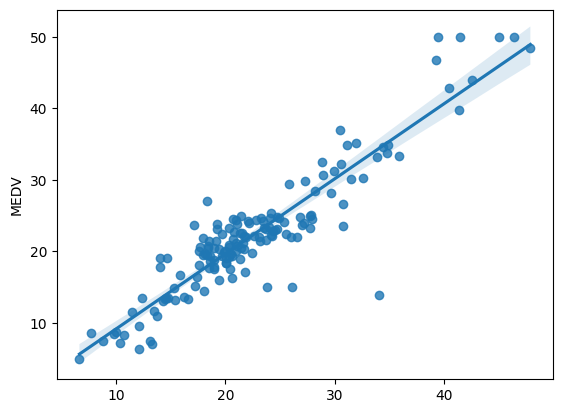

In [106]:
## plot a scatter plot for prediction
sns.regplot(x=prediction,y=test["MEDV"])

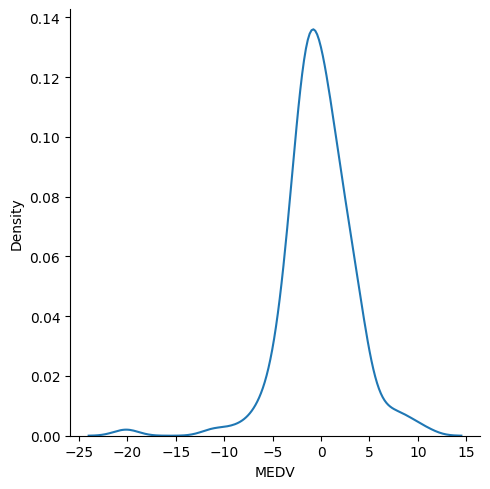

In [108]:
## calculating and plotting residuals
residuals = test["MEDV"]-prediction
sns.displot(residuals,kind='kde')

# Pickling the model file for deployment

In [39]:
import pickle

In [109]:
pickle.dump(model,open('model.pkl','wb'))

In [134]:
picked_model=pickle.load(open('model.pkl','rb'))